In [1]:
import pandas as pd

data = pd.read_csv('DeliveryTime.csv')
data.head()

,Latitude,Longitude,Product Nr,Actual Delivery Time
0,52.263007,7.005476,5.119010e+12,4
1,51.592293,5.316224,7.187600e+12,7
2,51.594927,4.546363,1.113020e+12,1
3,51.356960,5.311556,2.130740e+12,2
4,51.589600,4.777170,2.136330e+12,17


In [2]:
data.describe()

,Latitude,Longitude,Product Nr,Actual Delivery Time
count,20005.000000,20005.000000,2.000500e+04,20005.000000
mean,52.122797,5.584748,4.637958e+12,3.748063
std,0.564288,0.864061,2.280047e+12,4.489296
min,50.770793,3.387919,1.100030e+12,1.000000
25%,51.641167,4.951427,2.197900e+12,2.000000
50%,52.092734,5.668272,4.199100e+12,3.000000
75%,52.523599,6.257708,6.194950e+12,4.000000
max,53.478596,7.145816,8.200000e+12,50.000000


In [3]:
x = data[['Product Nr','Latitude','Longitude']].values


y = data['Actual Delivery Time'].values

names = ['Product Nr','Latitude','Longitude']

In [4]:
import numpy
from sklearn.model_selection import train_test_split

numpy.random.seed(1000)

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=1)

In [5]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_pred = regressor.predict(x_test)

In [7]:
regressor.score(x_test, y_test)

-0.0007712555701668844

In [8]:
print(regressor.coef_)

[ 2.53753240e-15  6.16548477e-02 -8.44770773e-02]


In [41]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(x_test)
pol_reg = LinearRegression()
pol_reg.fit(x_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

mean_absolute_error: 2.4710207873557413
mean_squared_error: 20.152765225304456
r2_score: 1.272924768569439e-05


ValueError: x and y must be the same size

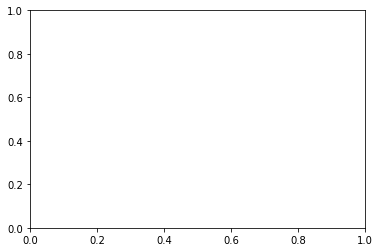

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.tree import export_graphviz
from IPython.display import Image
from subprocess import call


print("mean_absolute_error: " + str(mean_absolute_error(y_test, polynom)))
print("mean_squared_error: " + str(mean_squared_error(y_test, polynom)))
print("r2_score: " + str(r2_score(y_test, polynom)))
plt.scatter(x_test, y_test, color='red')
plt.plot(x_test, y_test, color='blue')
plt.title("Set Title")
plt.xlabel("Set Label")
plt.ylabel("Set Label")
plt.show()